In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn import svm
import ipywidgets
from ipywidgets import interact

In [142]:
# X, y = make_blobs(n_samples=40, centers=2, random_state=6) # type: ignore
X, y = make_blobs(n_samples=60, centers=2, cluster_std=2, random_state=6) # type: ignore
X = X - np.mean(X, axis=0)

In [143]:
def find_perpendicular_point(m, b, x1, y1):
    # Calculate the x-coordinate of the intersection point
    x2 = (x1 + m * (y1 - b)) / (m**2 + 1)
    
    # Calculate the y-coordinate of the intersection point
    y2 = m * x2 + b
    
    return x2, y2

In [144]:
# @interact(w=(-5, 5, 0.1), b=(-5, 5, 0.1), x_range=(-10, 10, 0.1), y_range=(-10, 10, 0.1))
def plt_line(w, b):
    x = np.linspace(-10, 10)
    y_point= -(w[0] / w[1]) * x - b / w[1]
    plt.figure(figsize=(6, 5))
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, color='blue', alpha=0.5, style=y, s=100)  
    ax.plot(x, y_point, color='indianred', linewidth=2) 

    for point in X[1:2]:
        x1, y1 = point
        m = -w[0] / w[1]  # slope of the line
        b_line = -b / w[1]  # y-intercept of the line
        
        # Calculate the x-coordinate of the perpendicular point
        x2 = (x1 + m * (y1 - b_line)) / (m**2 + 1)
        # Calculate the y-coordinate of the perpendicular point
        y2 = m * x2 + b_line
        
        # plt.quiver(x2, y2, x1 - x2, y1 - y2, angles='xy', scale_units='xy', scale=1, color='indianred', linewidth=1.5, linestyle='--')
        # plt.text(x1, y1, "$\\vec{x}$", color='brown', fontsize=12)
        # plt.text(x2 - (x2 - x1) / 2 + .2, y2 - (y2 - y1) / 2 - .45, "$\\vec{d}$", color='brown', fontsize=12)
        # plt.text(x2, y2 - .7, "$\\vec{x_p}$", color='brown', fontsize=12)
        # plt.scatter(x2, y2, s=40, marker='o', alpha=1, c='brown', zorder=5)
    
    # # Draw a perpendicular vector from the line that does not point to any datapoint
    # x1, y1 = 2.5, -(w[0] / w[1]) * 2.5 - b / w[1]  # A point on the line
    # m = -w[0] / w[1]  # slope of the line
    # x2 = x1 + .3  # Move 0.5 units to the right (reduced length)
    # y2 = -(1/m) * (x2 - x1) + y1  # Calculate the corresponding y-coordinate for the perpendicular line

    # plt.quiver(x1, y1, x2 - x1, y2 - y1, angles='xy', scale_units='xy', scale=1, color='green', linewidth=1, linestyle='--')
    # plt.text(x2, y2 , "$\\vec{w}$", fontsize=12, color='green', ha='center', va='bottom')
    
    # Step 2 (unit-vector):
    w_hat = w / (np.sqrt(np.sum(w ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(w ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x, y_point)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--', 
            linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'b--',
            linewidth=2)
    
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')
   
    for axis in ['top', 'right', 'bottom', 'left']:
        ax.spines[axis].set_visible(False)

    ax.tick_params(width=2.5, color='0.2')

    plt.xticks(size=14, weight='bold', color='0.2')
    plt.yticks(size=14, weight='bold', color='0.2')
    
    ax.set_xlabel(ax.get_xlabel(), fontsize=14, weight='bold', color='0.2')
    ax.set_ylabel(ax.get_ylabel(), fontsize=14, weight='bold', color='0.2')
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.legend().set_visible(False)
    plt.tick_params(left=False, bottom=False)
    # plt.xlim(x_range[0], x_range[1])
    # plt.ylim(y_range[0], y_range[1])
    plt.savefig('test-1.svg', bbox_inches='tight', dpi=250, facecolor=ax.get_facecolor())
    plt.show()

In [145]:
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X, y)

SVC(kernel='linear')

In [146]:
w = svc_model.coef_[0]
b = svc_model.intercept_[0]

x_points = np.linspace(-3, 3) 
y_points = -(w[0] / w[1]) * x_points - b / w[1]


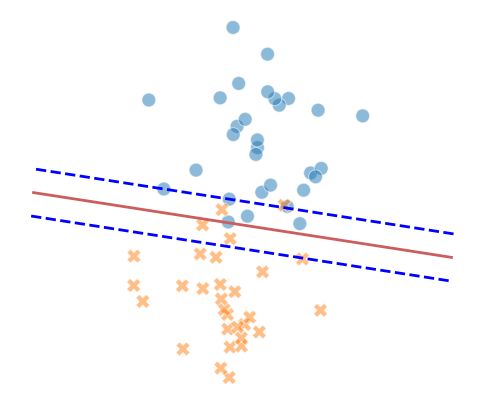

In [147]:
plt_line(w, b)

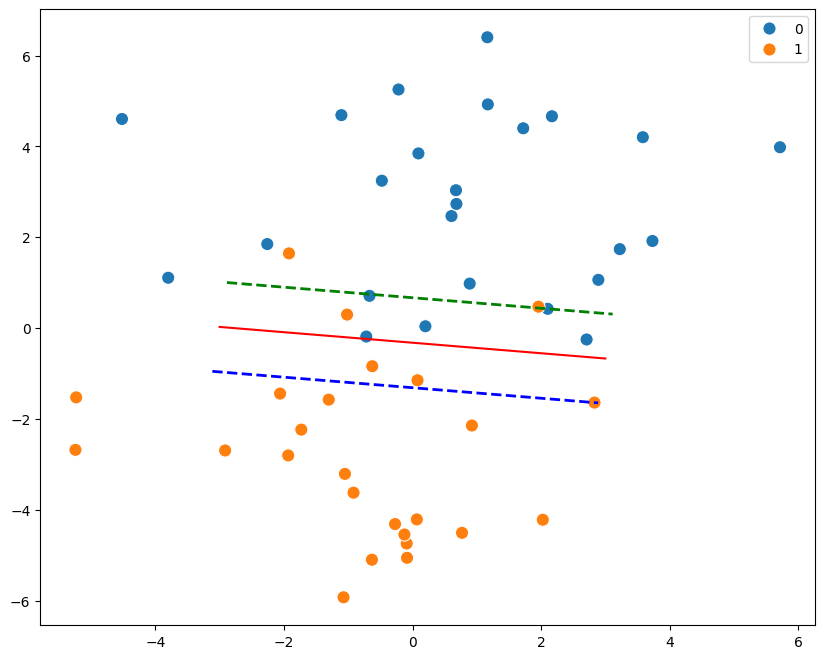

In [117]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y, 
                s=90);
plt.plot(x_points, y_points, c='r');
# Step 2 (unit-vector):
w_hat = w / (np.sqrt(np.sum(w ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(w ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)


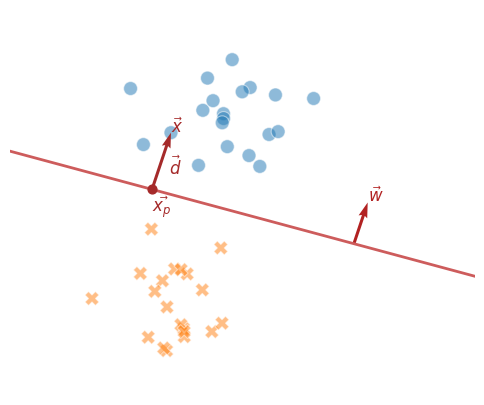

In [7]:
# sns.set(style='white', palette='Spectral', color_codes=True)

In [ ]:
# for point in X[1:2]:
#     x0 = point[0]
#     y0 = point[1]
#     y_line = w * x0 + b
#     x1, y1 = find_perpendicular_point(w[0] / w[1], -b / w[1], x0, y0)
#     plt.quiver(x1, y1, x0 - x1, y0 - y1, angles='xy', scale_units='xy', scale=1, color='brown', width=.0065)
#     plt.text(x0, y0, "$\\vec{x}$", color='brown', fontsize=12)
#     plt.text(x1 - (x1 - x0) / 2 + .2, y1 - (y1 - y0) / 2 - .45, "$\\vec{d}$", color='brown', fontsize=12)
#     plt.text(x1, y1 - .7, "$\\vec{x_p}$", color='brown', fontsize=12)
#     plt.scatter(x1, y1, s=40, marker='o', alpha=1, c='brown', zorder=5)

# x2, y2 = find_perpendicular_point(w[0] / w[1], -b / w[1], 12, -6)
# plt.quiver(x2, y2, 12 - x2, -6 - y2, angles='xy', scale_units='xy', scale=1, color='firebrick', width=.0065)
# plt.text(12, -6, "$\\vec{w}$", color='firebrick', fontsize=12)

In [13]:
x = np.array([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0])
label = np.array([1,1,1,0,0,0,0,0,0,0,1,1,1])

In [45]:
def poly_kernel(x, k=1, r=0):
   return (x*x.T + r)**k

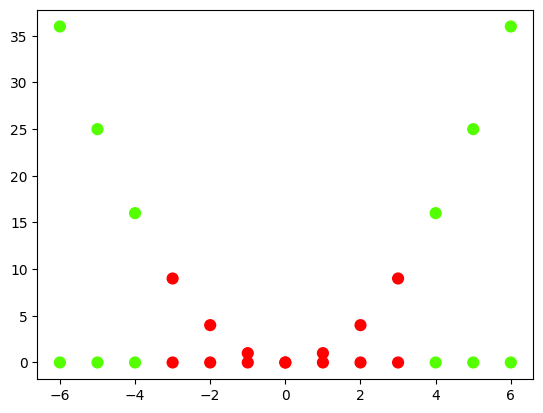

In [50]:
plt.scatter(x, y, c=label, cmap="prism",s=60)
plt.scatter(x,poly_kernel(x,1), c=label, cmap="prism", s= 60)
plt.show()

In [44]:
poly_kernel(x)

array([36, 25, 16,  9,  4,  1,  0,  1,  4,  9, 16, 25, 36])